# -------------: Logistic Regression : Bank Personal Loan Dataset :---------------

### Importing Dataset

In [113]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [114]:
data=pd.read_excel("D:/Emerson/LU_AI_ML/project/Day_21/Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [115]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


    We have to predict the Personal Loan , how much other factors are affecting Personal Loan(dependent variable)

        Target Variable( Dependent Variable is Categorical)

In [116]:
data.shape

(5000, 14)

In [117]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [119]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [120]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Droping Irrelevent Columns:
    ID & ZIP Code Doesn't make any impact on Personal Loan

In [121]:
data=data.drop(['ID','ZIP Code'], axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


### plot histogram graph

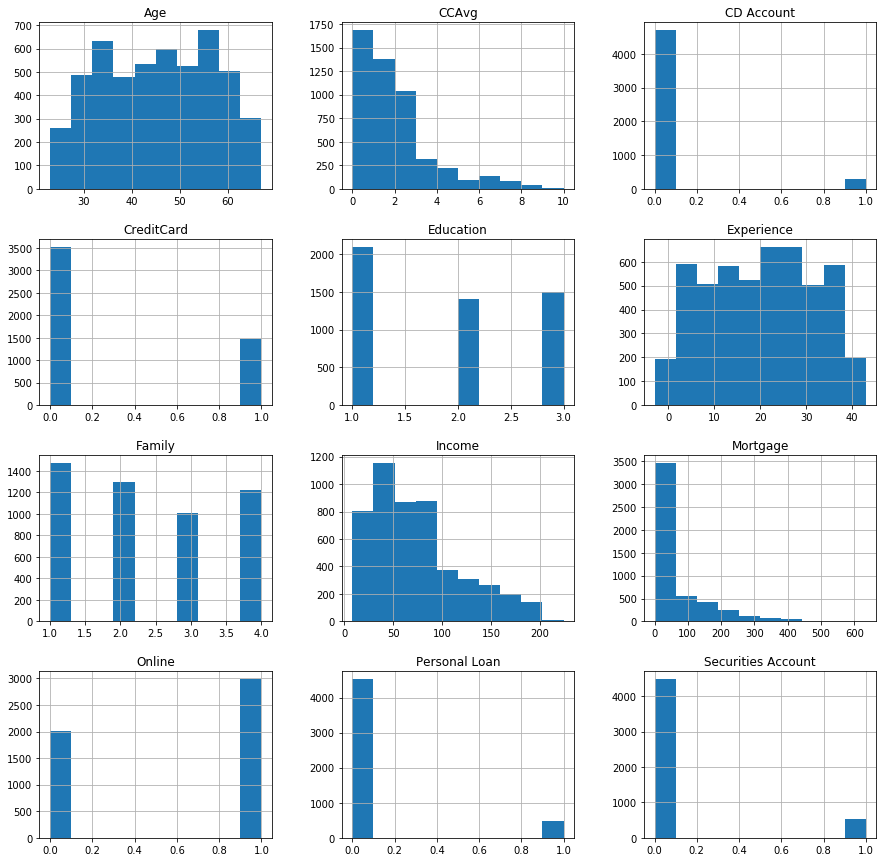

In [123]:
data.hist(figsize=(15,15))
plt.show()

#### Inference from Histogram
    Dependent Variable is Binary Categorical Variable ( 0 or 1 )
    CD Account, Credit Card, Education, Family, Online, Securities Account are Categorical Variables but in Encoded Format.

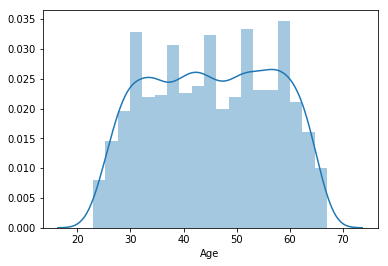

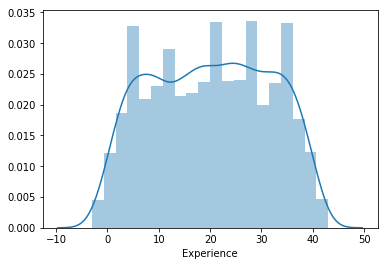

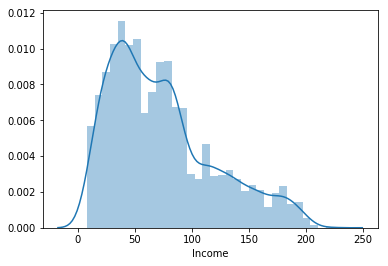

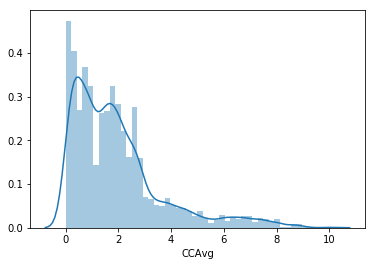

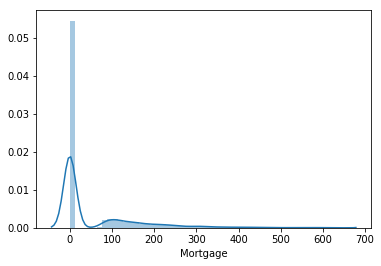

In [124]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in columns:
    sns.distplot(data[col])
    plt.show()

#### Inference from Distplot:
    Age, Experience, Income, CCAvg is Multimodal and has Positive Skewness (Mean > Median)
    Mortgage is Bimodal and has Positive Skewness( Mean > Median)

#### Finding Outliers using Boxplot

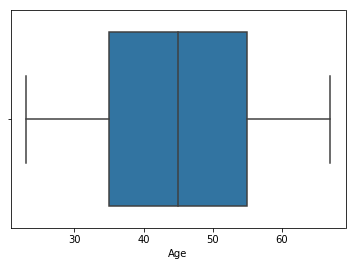

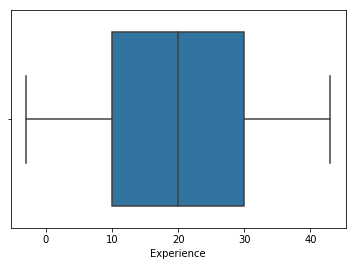

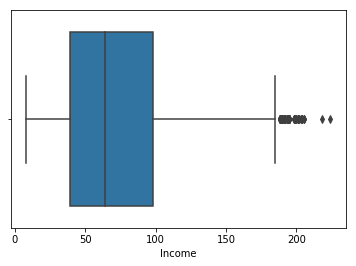

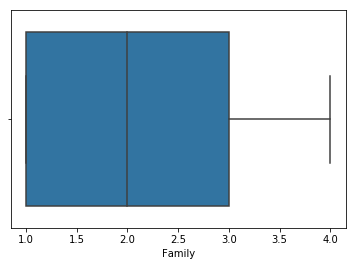

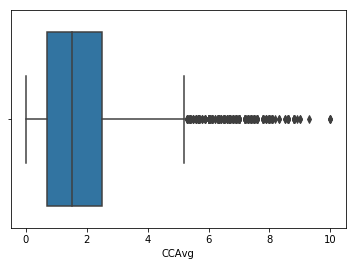

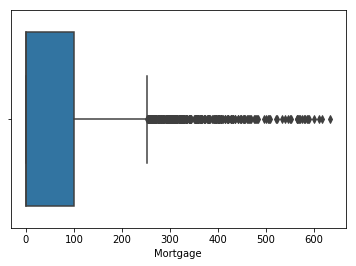

In [125]:
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for col in columns:
    sns.boxplot(data[col])
    plt.show()

### Inference from Boxplot
    Age, Experience, Family has No Outlier
    Mortgage , CCAvg has Many Outliers
    Income has Moderate Outliers

### Correlation Matrix

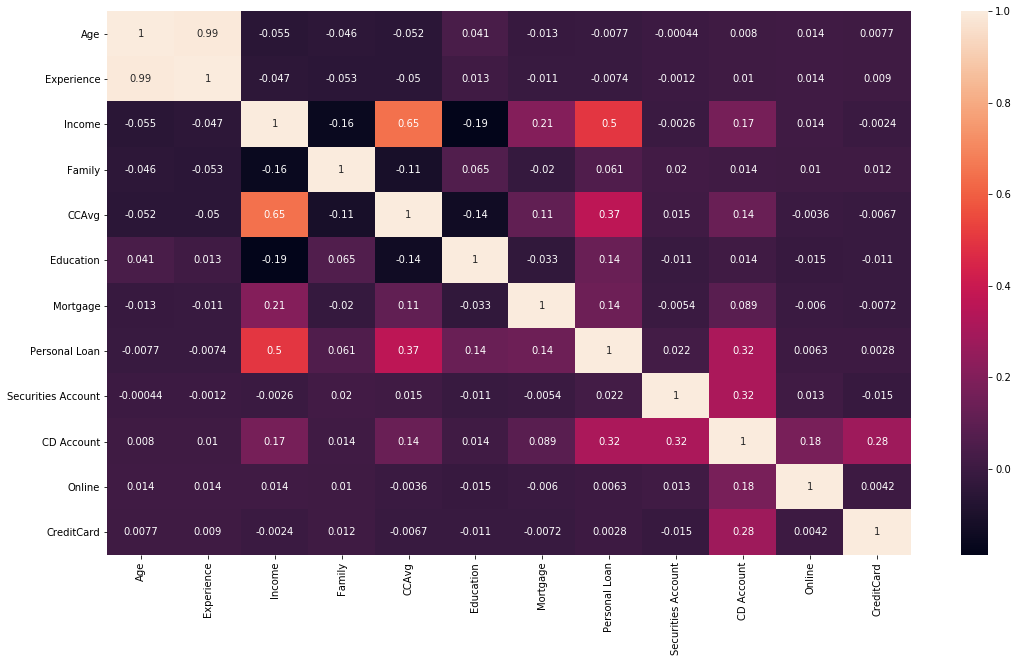

In [126]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), annot = True)

### Infernece from Correlation Matrix:
    Personal Loan has Moderate Correlation with CD Account(0.32), CCAvg(0.37), Income(0.5)
    Personal Loan has Almost No Correlation with other Independent Variables.

### Applying Logistic Regression
    Target Variable is Personal Loan which is Binary Categorical ( 0 or 1 )

In [127]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### Spliting Dataset

In [129]:
x = data.drop(['Personal Loan'], axis=1)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [130]:
y = data.iloc[:, 7:8]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


### Logistic Regression¶

In [131]:
import statsmodels.api as sm

In [132]:
x1 = sm.add_constant(x)
x1.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,1


In [133]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [134]:
x1 = sm.add_constant(x)
x1.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,1


In [135]:
logistic = sm.Logit(y,x1)

In [137]:
result=logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [138]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Sat, 15 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        23:47:44   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

### Inference from Logistic Regression
##### Not Significantly Important Columns ( p value > 0.05 )
    Age, Experience, Mortgage.
##### Most Significantly Important Columns ( p value < 0.05 )
    Income, Family, CCAvg, Education, Securities Account, CD Account, Online and Credit Card

#### Regression Equation is -
    Attrition = -12.192 + 0.0546(Income) + 0.6958(Family) + 0.124(CCAvg) + 1.7362(Education) + (-0.9368)(Securities Account) + 3.8225(CD Account) + (-0.6752)(Online) + (-1.1197)(CreditCard)